
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Mar 13, 2020)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


poll = pd.read_csv('poll-larger.csv')
poll.info()
poll.head()
poll['vote'].value_counts(normalize=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
vote    10000 non-null object
dtypes: object(1)
memory usage: 78.2+ KB


Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64

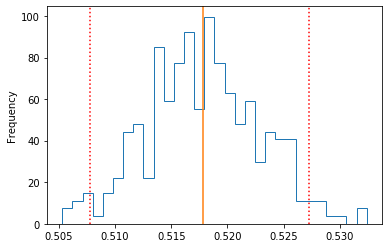

In [2]:
def basepoll(probO,n):
    return pd.DataFrame({'vote': np.random.choice(['Orgeron','Saban'], size=n, p=[probO,1-probO])})

def samplepoll(probOH,n=10000):
    return pd.DataFrame([basepoll(probOH,n)['vote'].value_counts(normalize=True) for i in range(300)])

bootpoll = samplepoll(.5181)
bootpoll['Orgeron'].plot(kind='hist',histtype='step',bins=30, density=True)
plt.axvline(bootpoll['Orgeron'].quantile(0.025), c='r',linestyle=':')
plt.axvline(bootpoll['Orgeron'].quantile(0.500), c='C1')
plt.axvline(bootpoll['Orgeron'].quantile(0.975), c='r',linestyle=':')

In [4]:
print(bootpoll['Orgeron'].quantile(0.025))
print(bootpoll['Orgeron'].quantile(0.500))
print(bootpoll['Orgeron'].quantile(0.975))

0.5077425000000001
0.5178
0.5272574999999999


A)  The 95% confidence interval is (0.5077,0.5273)

Estimate = 0.5178 +/- 0.00975 (at 95% confidence)

B)  The point estimate is 0.5178

C)  The margin of error is 0.00975 or +/- 0.975%